In [1]:
import numpy as np
import pandas as pd
import DNN_model as dnn 

In [2]:
# Set up hyper parameters 
c = 1
layer_dims = [10, c] 
learning_rate = 0.0005
keep_prob = 1.0
num_epochs = 300
minibatch_size = 64
print_summary = True
isBinary = c <= 2 
hyperparams = dnn.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)

In [3]:
# Generate data
m = 1000
n_x = 10
label = 'Survived'
x_data = np.random.rand(m, n_x)
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m))[0]
else:
    y_test = np.random.randint(c, size=(1, m))[0]

df = pd.DataFrame(x_data)
df[label] = y_test


----------------------

Binary classification neural network with hyperparameters:
layer_dims: [10, 1] keep_prob: 1.0 learning_rate: 0.0005 num_epochs: 300 minibatch_size: 64
Training underway...
Done training!


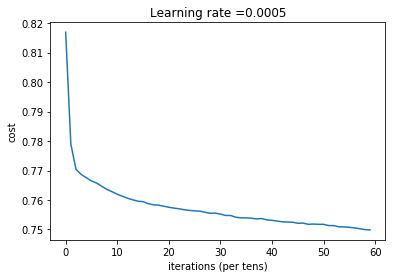

train_accuracy : 0.577143
test_accuracy : 0.52
precision : 0.454545454545
recall : 0.373134328358
f1score : 0.409836065574


In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
train_orig = df.sample(frac=0.70)
test_orig = df.drop(train_orig.index) 

(x_train, y_train) = dnn.format_dataframe_for_training(train_orig, label, c)
(x_test, y_test) = dnn.format_dataframe_for_training(test_orig, label, c)

model = dnn.train_with_hyperparameter_bundle(x_train, y_train, x_test, y_test, hyperparams, print_summary=print_summary)
# parameters = model[dnn.KEY_PARAMETERS]
# prediction = dnn.predict(x_train, parameters, isBinary)


----------------------

Binary classification neural network with hyperparameters:
layer_dims: [1] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


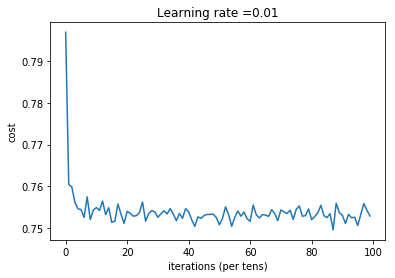

train_accuracy : 0.553223
test_accuracy : 0.459459
precision : 0.430656934307
recall : 0.366459627329
f1score : 0.395973154362

----------------------

Binary classification neural network with hyperparameters:
layer_dims: [1] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...
Done training!


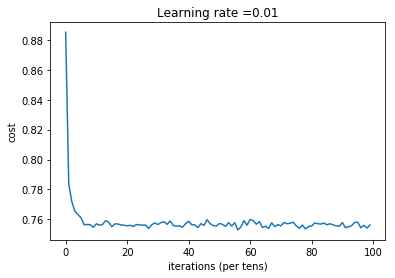

train_accuracy : 0.565217
test_accuracy : 0.516517
precision : 0.542857142857
recall : 0.22754491018
f1score : 0.320675105485

----------------------

Binary classification neural network with hyperparameters:
layer_dims: [1] keep_prob: 1.0 learning_rate: 0.01 num_epochs: 500 minibatch_size: 64
Training underway...


KeyboardInterrupt: 

In [10]:
# Example of using kfold to determine best hyper parameters
hyperparams1 = dnn.create_hyperparameter_bundle(layer_dims = [c], learning_rate = 0.01, num_epochs = 500, keep_prob = 1.0)
hyperparams2 = dnn.create_hyperparameter_bundle(layer_dims = [5,c], learning_rate = 0.001, num_epochs = 500, keep_prob = 0.75)

avg_accuracy1 = dnn.kfold(df, label, hyperparams1, k = 3.0, print_summary = True)
avg_accuracy2 = dnn.kfold(df, label, hyperparams2, k = 3.0, print_summary = True)

print "avg_accuracy1 " + str(avg_accuracy1)
print "avg_accuracy2 " + str(avg_accuracy2)